In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.cm as cm

import Lib.ctm as ctm

## 1. Load Data

In [2]:
cells = pd.read_csv('Preprocessed Data/cells.csv', index_col=0)

In [3]:
# divergingRatio: offramp/mainline (updated every 5 min)
divergingRatio = pd.read_csv('Preprocessed Data/divergingRatio.csv', index_col=0) 

divergingRatio.head()

,12:00:00 PM,12:05:00 PM,12:10:00 PM,12:15:00 PM,12:20:00 PM,12:25:00 PM,12:30:00 PM,12:35:00 PM,12:40:00 PM,12:45:00 PM,...,7:10:00 PM,7:15:00 PM,7:20:00 PM,7:25:00 PM,7:30:00 PM,7:35:00 PM,7:40:00 PM,7:45:00 PM,7:50:00 PM,7:55:00 PM
717667,"[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]",...,"[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]"
717672,"[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]","[0.91, 0.09]",...,"[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]","[0.89, 0.11]"
761128,"[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.94, 0.06]","[0.94, 0.06]","[0.94, 0.06]","[0.94, 0.06]",...,"[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]"
761152,"[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]","[0.92, 0.08]",...,"[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]","[0.9299999999999999, 0.07]"
761165,"[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]","[0.96, 0.04]",...,"[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]","[0.97, 0.03]"


In [4]:
# calibrated parameters of fundamental diagram
calibratedParam = pd.read_csv('Preprocessed Data/FDCalibration.csv', index_col=0)

calibratedParam.head()

,cap(veh/h),congSpd(km/h),criticalDen(veh/km),dropCap(veh/h),freeSpd(km/h),maxDen(veh/km)
717659,8208.0,32.0,83.0,7431.0,99.0,312.0
773154,8340.0,30.0,81.0,7548.0,103.0,331.0
717667,7668.0,25.0,77.0,6858.0,100.0,350.0
717672,7968.0,16.0,79.0,7259.0,101.0,532.0
773193,8136.0,29.0,81.0,7420.0,101.0,333.0


In [5]:
#calibratedParam.loc[773154]['congSpd(km/h)'] = 20
calibratedParam.loc[773154]['dropCap(veh/h)'] = 7800.0
calibratedParam.loc[773154]['maxDen(veh/km)'] = calibratedParam.loc[773154]['criticalDen(veh/km)'] + calibratedParam.loc[773154]['dropCap(veh/h)']/calibratedParam.loc[773154]['congSpd(km/h)']


calibratedParam.loc[717667]['congSpd(km/h)'] = 20
calibratedParam.loc[717667]['dropCap(veh/h)'] = 7400 
calibratedParam.loc[717667]['maxDen(veh/km)'] = calibratedParam.loc[717667]['criticalDen(veh/km)'] + calibratedParam.loc[717667]['dropCap(veh/h)']/calibratedParam.loc[717667]['congSpd(km/h)']

calibratedParam.head()

,cap(veh/h),congSpd(km/h),criticalDen(veh/km),dropCap(veh/h),freeSpd(km/h),maxDen(veh/km)
717659,8208.0,32.0,83.0,7431.0,99.0,312.0
773154,8340.0,30.0,81.0,7800.0,103.0,341.0
717667,7668.0,20.0,77.0,7400.0,100.0,447.0
717672,7968.0,16.0,79.0,7259.0,101.0,532.0
773193,8136.0,29.0,81.0,7420.0,101.0,333.0


## 2. Simulation setting

In [6]:
totalVol = pd.read_csv('Preprocessed Data/totalVol(veh_h).csv', index_col=0)
mainSpd = pd.read_csv('Preprocessed Data/mainSpd(km_h).csv', index_col=0)
mainDen = pd.read_csv('Preprocessed Data/mainDen(veh_km).csv', index_col=0)


totalVol_0505 = totalVol[totalVol.columns[(288*0+144):(288*0+144+96)]]
totalVol_0506 = totalVol[totalVol.columns[(288*1+144):(288*1+144+96)]]
totalVol_0507 = totalVol[totalVol.columns[(288*2+144):(288*2+144+96)]]
totalVol_0508 = totalVol[totalVol.columns[(288*3+144):(288*3+144+96)]]
totalVol_0509 = totalVol[totalVol.columns[(288*4+144):(288*4+144+96)]]
totalVol_0510 = totalVol[totalVol.columns[(288*5+144):(288*5+144+96)]]

mainSpd_0505 = mainSpd[mainSpd.columns[(288*0+144):(288*0+144+96)]]
mainSpd_0506 = mainSpd[mainSpd.columns[(288*1+144):(288*1+144+96)]]
mainSpd_0507 = mainSpd[mainSpd.columns[(288*2+144):(288*2+144+96)]]
mainSpd_0508 = mainSpd[mainSpd.columns[(288*3+144):(288*3+144+96)]]
mainSpd_0509 = mainSpd[mainSpd.columns[(288*4+144):(288*4+144+96)]]
mainSpd_0510 = mainSpd[mainSpd.columns[(288*5+144):(288*5+144+96)]]

mainDen_0505 = mainDen[mainDen.columns[(288*0+144):(288*0+144+96)]]
mainDen_0506 = mainDen[mainDen.columns[(288*1+144):(288*1+144+96)]]
mainDen_0507 = mainDen[mainDen.columns[(288*2+144):(288*2+144+96)]]
mainDen_0508 = mainDen[mainDen.columns[(288*3+144):(288*3+144+96)]]
mainDen_0509 = mainDen[mainDen.columns[(288*4+144):(288*4+144+96)]]
mainDen_0510 = mainDen[mainDen.columns[(288*5+144):(288*5+144+96)]]


mainVol_0505 = totalVol.loc[mainSpd.index][totalVol.columns[(288*0+144):(288*0+144+96)]]
mainVol_0506 = totalVol.loc[mainSpd.index][totalVol.columns[(288*1+144):(288*1+144+96)]]
mainVol_0507 = totalVol.loc[mainSpd.index][totalVol.columns[(288*2+144):(288*2+144+96)]]
mainVol_0508 = totalVol.loc[mainSpd.index][totalVol.columns[(288*3+144):(288*3+144+96)]]
mainVol_0509 = totalVol.loc[mainSpd.index][totalVol.columns[(288*4+144):(288*4+144+96)]]
mainVol_0510 = totalVol.loc[mainSpd.index][totalVol.columns[(288*5+144):(288*5+144+96)]]

In [7]:
timeSize = 6/60 # unit: min

# Initialize cell parameters
cellParams = {}

for idx, row in cells.iterrows():
    sensorID = row['ID']
    cellType = row['Type']
    name = 'c{}'.format(sensorID)
    cellParams[name] = {'type': cellType, 
                        'params': {'name': name, 'timeSize': timeSize},
                        'neighbors': {}}
    
    ### For cell initialization
    if row['Link'] == 'Mainline':
        # Append mainline capacity
        cellParams[name]['params']['nominalCap'] = calibratedParam.loc[sensorID]['cap(veh/h)']
    else:
        # Append on-ramp/off-ramp capacity, assume ramp capacity equals 1500 veh/(lane hour)
        cellParams[name]['params']['nominalCap'] = 1500 * row['Lanes']
    
    if cellType == 'cell':
        cellParams[name]['params']['freeSpd'] = calibratedParam.loc[sensorID]['freeSpd(km/h)']
        cellParams[name]['params']['conSpd'] = calibratedParam.loc[sensorID]['congSpd(km/h)']
        cellParams[name]['params']['conDen'] = calibratedParam.loc[sensorID]['maxDen(veh/km)']
        cellParams[name]['params']['length'] = row['Cell Len(km)']
    
    ### For setting predecessors
    predecessorID = eval(row['Up'])
    if predecessorID is None:
        cellParams[name]['neighbors']['predecessor'] = None
    else:
        cellParams[name]['neighbors']['predecessor'] = ['c{}'.format(cells.loc[i]['ID']) for i in predecessorID]
        if len(predecessorID) > 1:
            # More than one predecessors means merging.
            cellParams[name]['merging'] = {'method': 'priority-based', 'params': {}}
            # lower number denotes higher priority
            cellParams[name]['merging']['params'] = {'priority': [0, 1]}
    
    ### For setting successors
    successorID = eval(row['Down'])
    if successorID is None:
        cellParams[name]['neighbors']['successor'] = None
    else:
        cellParams[name]['neighbors']['successor'] = ['c{}'.format(cells.loc[i]['ID']) for i in successorID]
        if len(successorID) > 1:
            # More than one successors means diverging.
            cellParams[name]['diverging'] = {'method': 'proportion-based', 'params': {}}
            proportion = []
            for c in divergingRatio.columns:
                proportion.extend([eval(divergingRatio.loc[sensorID][c])]*round(5/timeSize))
            cellParams[name]['diverging']['params']['proportion'] = proportion
    
    ### For setting demands
    if cellType == 'source':
        cellDemand = []
        for c in totalVol_0507.columns:
            cellDemand.extend([totalVol_0507.loc[sensorID][c]]*round(5/timeSize))
        cellParams[name]['demand'] = cellDemand

KeyError: 717654

In [62]:
totalStepNum = round(96*(5/timeSize))

aggSize = round(5/timeSize)

sim = ctm.Simulation(totalStepNum)

sim.initializeNetwork(cellParams)

In [63]:
sim.initializeSaver()
for i in range(totalStepNum):
    
    sim.network.cells['c717667'].state['den'] = mainDen_0507.loc[717667][i//50]
    sim.network.cells['c717667'].state['numVeh'] = mainDen_0507.loc[717667][i//50] * sim.network.cells['c717667'].cellLen

    #sim.network.cells['c761165'].state['den'] = mainDen_0506.loc[761165][i//50]
    #sim.network.cells['c761165'].state['numVeh'] = mainDen_0506.loc[761165][i//50] * sim.network.cells['c761165'].cellLen

    #sim.network.cells['c717672'].state['den'] = mainDen_0506.loc[717672][i//50]
    #sim.network.cells['c773193'].state['den'] = mainDen_0506.loc[773193][i//50]

    sim.simulateOneStep(i, True)

## 3. Comparison

In [64]:
mainCellMileStone = np.cumsum(list(cells[cells['Type']=='cell']['Cell Len(km)']))
cellNames = cells[cells['Type']=='cell']['ID']

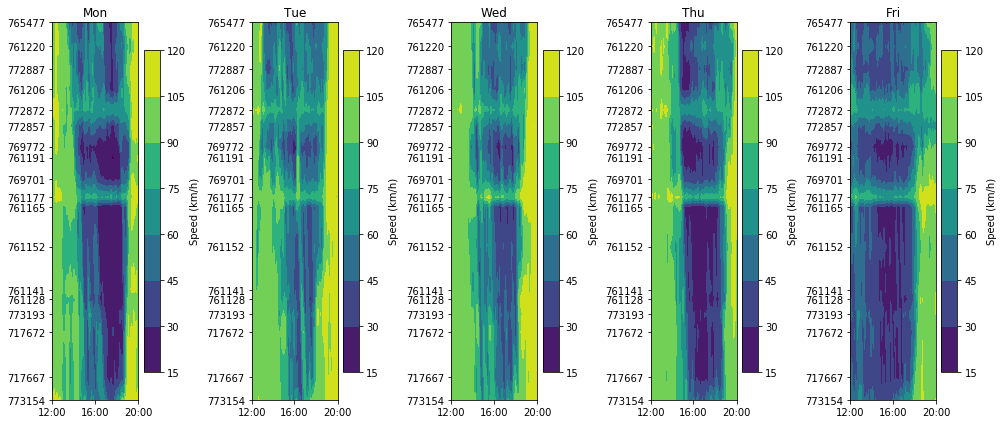

In [65]:
x, y = np.meshgrid(range(96), mainCellMileStone)

plt.figure(figsize=(14, 6))

plt.subplot(151)
plt.contourf(x, y, mainSpd_0506.iloc[1:-1], vmin=15, vmax=120)
plt.title('Mon')
m = plt.cm.ScalarMappable()
m.set_array(mainSpd_0506.iloc[1:-1])
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')
plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])


plt.subplot(152)
plt.contourf(x, y, mainSpd_0507.iloc[1:-1], vmin=15, vmax=120)
plt.title('Tue')
m = plt.cm.ScalarMappable()
m.set_array(mainSpd_0506.iloc[1:-1])
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')
plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])



plt.subplot(153)
plt.contourf(x, y, mainSpd_0508.iloc[1:-1], vmin=15, vmax=120)
plt.title('Wed')
m = plt.cm.ScalarMappable()
m.set_array(mainSpd_0506.iloc[1:-1])
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')
plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])



plt.subplot(154)
plt.contourf(x, y, mainSpd_0509.iloc[1:-1], vmin=15, vmax=120)
plt.title('Thu')
m = plt.cm.ScalarMappable()
m.set_array(mainSpd_0506.iloc[1:-1])
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')
plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])



plt.subplot(155)
plt.contourf(x, y, mainSpd_0510.iloc[1:-1], vmin=15, vmax=120)
plt.title('Fri')
m = plt.cm.ScalarMappable()
m.set_array(mainSpd_0506.iloc[1:-1])
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')
plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])

plt.tight_layout()
plt.show()

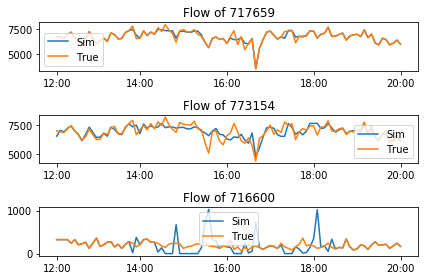

In [66]:
flow717659 = np.array(list(zip(*sim.network.cells['c717659'].saver['subOutVeh']))[0])*aggSize*12
avgFlow717659 = []
for i in range(96):
    avgFlow717659.append(np.mean(flow717659[(i*aggSize):(i*aggSize+aggSize)]))
    
flow773154 = np.array(list(zip(*sim.network.cells['c773154'].saver['subOutVeh']))[0])*aggSize*12
avgFlow773154 = []
for i in range(96):
    avgFlow773154.append(np.mean(flow773154[(i*aggSize):(i*aggSize+aggSize)]))
        
flow716600 = np.array(list(zip(*sim.network.cells['c716600'].saver['subOutVeh']))[0])*aggSize*12
avgFlow716600 = []
for i in range(96):
    avgFlow716600.append(np.mean(flow716600[(i*aggSize):(i*aggSize+aggSize)]))
        
plt.subplot(311)
plt.plot(range(96), avgFlow717659)
plt.plot(range(96), mainVol_0507.loc[717659])
plt.legend(['Sim', 'True'])

plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.title('Flow of 717659')

plt.subplot(312)
plt.plot(range(96), avgFlow773154)
plt.plot(range(96), mainVol_0507.loc[773154])
plt.legend(['Sim', 'True'])

plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.title('Flow of 773154')


plt.subplot(313)
plt.plot(range(96), avgFlow716600)
plt.plot(range(96), totalVol_0507.loc[716600])
plt.legend(['Sim', 'True'])

plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.title('Flow of 716600')

#plt.subplot(414)
#plt.plot(range(96), totalVol_0510.loc[716600]+mainVol_0510.loc[717659]-totalVol_0510.loc[773154])
#plt.gca().set_yticks([-1000, 0])
#plt.grid()

plt.tight_layout()
plt.show()


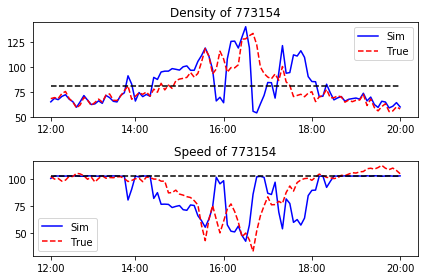

In [67]:
den773154 = np.array(sim.network.cells['c773154'].saver['den'])
avgDen773154 = []
for i in range(96):
    avgDen773154.append(np.mean(den773154[(i*aggSize):(i*aggSize+aggSize)]))

    
plt.subplot(211)
plt.plot(range(96), avgDen773154, 'b')
plt.plot(range(96), mainDen_0507.loc[773154], 'r--')
#plt.plot(range(96), mainDen_0506.loc[717667], 'g--')

plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.title('Density of 773154')
plt.legend(['Sim', 'True'])
plt.plot([0, 95], [sim.network.cells['c773154'].criticalDen]*2, 'k--')

plt.subplot(212)
plt.plot(range(96), np.array(avgFlow773154)/np.array(avgDen773154), 'b')
plt.plot(range(96), mainSpd_0507.loc[773154], 'r--')
plt.title('Speed of 773154')
plt.legend(['Sim', 'True'])
plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.plot([0, 95], [sim.network.cells['c773154'].freeSpd]*2, 'k--')


plt.tight_layout()
plt.show()

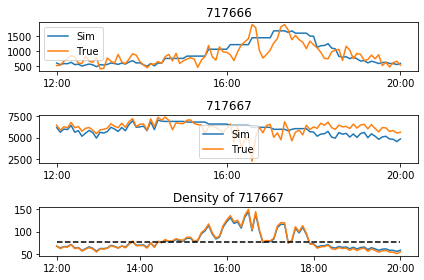

In [13]:
flow717666 = np.array(list(zip(*sim.network.cells['c717667'].saver['subOutVeh']))[1])*aggSize*12
avgFlow717666 = []
for i in range(96):
    avgFlow717666.append(np.mean(flow717666[(i*aggSize):(i*aggSize+aggSize)]))
    
flow717667 = np.array(list(zip(*sim.network.cells['c717667'].saver['subOutVeh']))[0])*aggSize*12
avgFlow717667 = []
for i in range(96):
    avgFlow717667.append(np.mean(flow717667[(i*aggSize):(i*aggSize+aggSize)]))
    
den717667 = np.array(sim.network.cells['c717667'].saver['den'])
avgDen717667 = []
for i in range(96):
    avgDen717667.append(np.mean(den717667[(i*aggSize):(i*aggSize+aggSize)]))
    
    
plt.subplot(311)
plt.plot(range(96), avgFlow717666)
plt.plot(range(96), totalVol_0507.loc[717666])
plt.legend(['Sim', 'True'])

plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])
plt.title('717666')

plt.subplot(312)
plt.plot(range(96), avgFlow717667)
plt.plot(range(96), totalVol_0507.loc[717667])
plt.legend(['Sim', 'True'])

plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])
plt.title('717667')


plt.subplot(313)
plt.plot(range(96), avgDen717667)
plt.plot(range(96), mainDen_0507.loc[717667])
plt.title('Density of 717667')
plt.gca().set_xticks([0, 23, 47, 71, 95])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt.plot([0, 95], [sim.network.cells['c717667'].criticalDen]*2, 'k--')


plt.tight_layout()
plt.show()



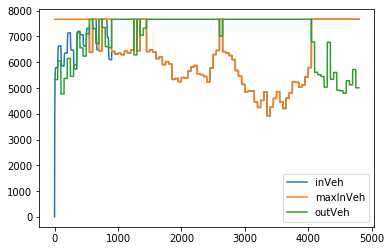

In [14]:
plt.plot(range(4800), np.array(sim.network.cells['c717667'].saver['inVeh'])*600)
plt.plot(range(4800), np.array(sim.network.cells['c717667'].saver['maxInVeh'])*600)
plt.plot(range(4800), np.array(sim.network.cells['c717667'].saver['outVeh'])*600)

plt.legend(['inVeh', 'maxInVeh', 'outVeh'])
plt.show()

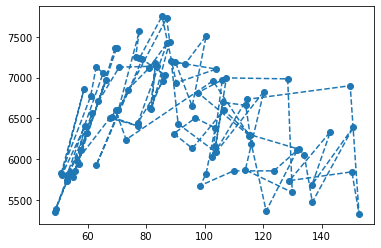

In [15]:
plt.plot(np.array(mainVol_0506.loc[773154])/np.array(mainSpd_0506.loc[773154]), mainVol_0506.loc[773154], 'o--')

plt.show()

In [16]:
simulatedSpd_0506 = {}
simulatedVol_0506 = {}
simulatedDen_0506 = {}

aggSize = round(5/timeSize)
for _, cell in sim.network.cells.items():
    if type(cell) == ctm.Cell:
        # Cell
        outflow = np.array(cell.saver['outVeh']) * (60/timeSize)
        density = np.array(cell.saver['numVeh']) / cell.cellLen
        speed = outflow/(density+0.1)
        aggregateSpd = []
        aggregateVol = []
        aggregateDen = []
        for i in range(96):
            aggregateSpd.append(np.mean(speed[(i*aggSize):(i*aggSize+aggSize)]))
            aggregateVol.append(np.mean(outflow[(i*aggSize):(i*aggSize+aggSize)]))
            aggregateDen.append(np.mean(density[(i*aggSize):(i*aggSize+aggSize)]))

        simulatedSpd_0506[int(cell.name[1:])] = aggregateSpd
        simulatedVol_0506[int(cell.name[1:])] = aggregateVol
        simulatedDen_0506[int(cell.name[1:])] = aggregateDen
        
    elif type(cell) == ctm.Source:
        # Source
        outflow = np.array(cell.saver['outVeh']) * (60/timeSize)
        aggregateVol = []
        for i in range(96):
            aggregateVol.append(np.mean(outflow[(i*aggSize):(i*aggSize+aggSize)]))

        simulatedVol_0506[int(cell.name[1:])] = aggregateVol


simulatedSpd_0506 = pd.DataFrame(simulatedSpd_0506).T
simulatedSpd_0506.columns = pd.date_range("2019/05/06 12:00", "2019/05/06 19:55", freq="5min")

simulatedVol_0506 = pd.DataFrame(simulatedVol_0506).T
simulatedVol_0506.columns = pd.date_range("2019/05/06 12:00", "2019/05/06 19:55", freq="5min")

simulatedDen_0506 = pd.DataFrame(simulatedDen_0506).T
simulatedDen_0506.columns = pd.date_range("2019/05/06 12:00", "2019/05/06 19:55", freq="5min")

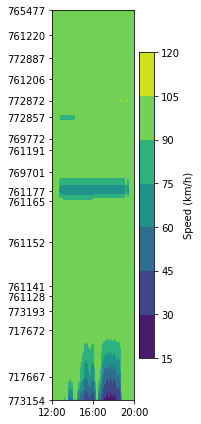

In [17]:
x, y = np.meshgrid(range(96), mainCellMileStone)

plt.figure(figsize=(2.8, 6))
plt.contourf(x, y, simulatedSpd_0506, vmin=15, vmax=120)
m = plt.cm.ScalarMappable()
m.set_array(simulatedSpd_0506)
m.set_clim(15, 120)
cb = plt.colorbar(m, boundaries=np.linspace(15, 120, 8))
cb.ax.set_ylabel('Speed (km/h)')

plt.gca().set_yticks(mainCellMileStone)
plt.gca().set_yticklabels(cellNames)
plt.gca().set_xticks([0, 47, 95])
plt.gca().set_xticklabels(['12:00', '16:00', '20:00'])

plt.tight_layout()

plt.show()